In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('./Synthetic.csv')

In [42]:
data.head()

,Unnamed: 0,X,Y
0,0,37.454012,126.746701
1,1,95.071431,293.927975
2,2,73.199394,225.441700
3,3,59.865848,183.586508
4,4,15.601864,39.020372


In [43]:
data = data.drop(columns = 'Unnamed: 0')

In [44]:
data.head()

,X,Y
0,37.454012,126.746701
1,95.071431,293.927975
2,73.199394,225.441700
3,59.865848,183.586508
4,15.601864,39.020372


In [45]:
m= (data.shape[0])
X =  data['X'].values
y_true = data['Y'].values

In [46]:
X.shape,y_true.shape

((50,), (50,))

In [47]:
X = (X-np.mean(X))/np.std(X)
X = X.reshape((1,-1))
X.shape

y_true = y_true.reshape((-1,1))
print(y_true.shape)
Y=y_true

(50, 1)


In [48]:
def mse(y_true, X, b, w):
    predictions = np.dot(w,X) + b
    return np.mean((y_true - predictions) ** 2) / 2

In [49]:
theta0,theta1=0,0

In [50]:
theta0,theta1 = np.array([theta0]).reshape((1,1)),np.array([theta1]).reshape((1,1))

In [51]:
a=np.random.permutation(X.shape[1])
print(a)

[35 49  7  2 16 36 47 42 37 13 43  6  0 28 33 45 41  9 18 14 17 44 48 32
 11 40  5  1 25 30  4 12 46  8 34 29 22 10 39 15 24 26 19 21 23 20  3 27
 31 38]


In [52]:
def shuffle_data(X, Y):
    perm = np.random.permutation(X.shape[0])
    return X[perm].T, Y[perm]

In [53]:
def gradient_descent(X, Y, tol, iterations, w, b, alpha, batch_size):
    j = 0
    m = X.shape[1]
    e=[]
    
    #print(X.shape,Y.shape)

    while j < iterations:
        print(f"Iter {j+1}: ")
        j += 1
        x=1
        X,Y = shuffle_data(X.T,Y)
        for i in range(0, m , batch_size):
            if (batch_size * x <= m):
                X_batch = X[: , i:i + batch_size]
                Y_batch = Y[i:i + batch_size , :]
               
            else:
                X_batch = X[: , i:m]
                Y_batch = Y[i:m , :]
            x+=1

            y_hat = w * X_batch + b
            dw = np.mean(np.dot(X_batch,(y_hat.T - Y_batch)))
            db = np.mean(y_hat.T - Y_batch)

            r = mse(Y_batch.T, X_batch, b, w)

            w_new = w - alpha * dw
            b_new = b - alpha * db

            r_new = mse(Y_batch.T, X_batch, b_new, w_new)

            if abs(r - r_new) < tol:
                print(f"Early stopping at iteration {j}")
                print("=" * 30)
                print(f"Final Slope: {float(w_new.item()):.5f}, Intercept: {float(b_new.item()):.5f}, MSE: {float(r_new.item()):.5f}")
                return w_new, b_new, e

            w, b = w_new, b_new

            e.append(r)

            print(f"Batch {x-1}: MSE: {float(r.item()):.5f} | w: {float(w.item()):.5f}, b: {float(b.item()):.5f}")


    print("=" * 90)
    print(f"Final Slope: {float(w.item()):.5f}, Intercept: {float(b.item()):.5f}, MSE: {float(r.item()):.5f} after {j} iterations")
    return w, b, e


In [56]:
g=gradient_descent(X,Y,tol=0.001,iterations=1000,w=theta0,b=theta1,alpha=0.01,batch_size=3) #For stochastic batch_size is 1 and for mini_batch its >1 and <len

Iter 1: 
Batch 1: MSE: 7938.54041 | w: 0.38435, b: 1.06399
Batch 2: MSE: 973.00340 | w: -0.79992, b: 1.43127
Batch 3: MSE: 8235.64958 | w: -0.97167, b: 2.66927
Batch 4: MSE: 25395.37301 | w: 6.05165, b: 4.78424
Batch 5: MSE: 9240.87723 | w: 7.35267, b: 5.92780
Batch 6: MSE: 6457.26053 | w: 7.17000, b: 6.90838
Batch 7: MSE: 14192.41707 | w: 11.44179, b: 8.08523
Batch 8: MSE: 8113.15196 | w: 11.25979, b: 9.29026
Batch 9: MSE: 22736.49880 | w: 19.61586, b: 11.24328
Batch 10: MSE: 8536.68128 | w: 20.39164, b: 12.44019
Batch 11: MSE: 5381.15976 | w: 19.45433, b: 13.40373
Batch 12: MSE: 11377.10056 | w: 21.63355, b: 14.70184
Batch 13: MSE: 12511.80077 | w: 25.26618, b: 16.17033
Batch 14: MSE: 7230.72627 | w: 24.84768, b: 17.32283
Batch 15: MSE: 16065.18302 | w: 30.15114, b: 19.06583
Batch 16: MSE: 14794.59004 | w: 35.55098, b: 20.77993
Batch 17: MSE: 6106.99859 | w: 35.47190, b: 21.87974
Iter 2: 
Batch 1: MSE: 6973.31490 | w: 36.45710, b: 22.97709
Batch 2: MSE: 10035.16066 | w: 38.96615, b: 

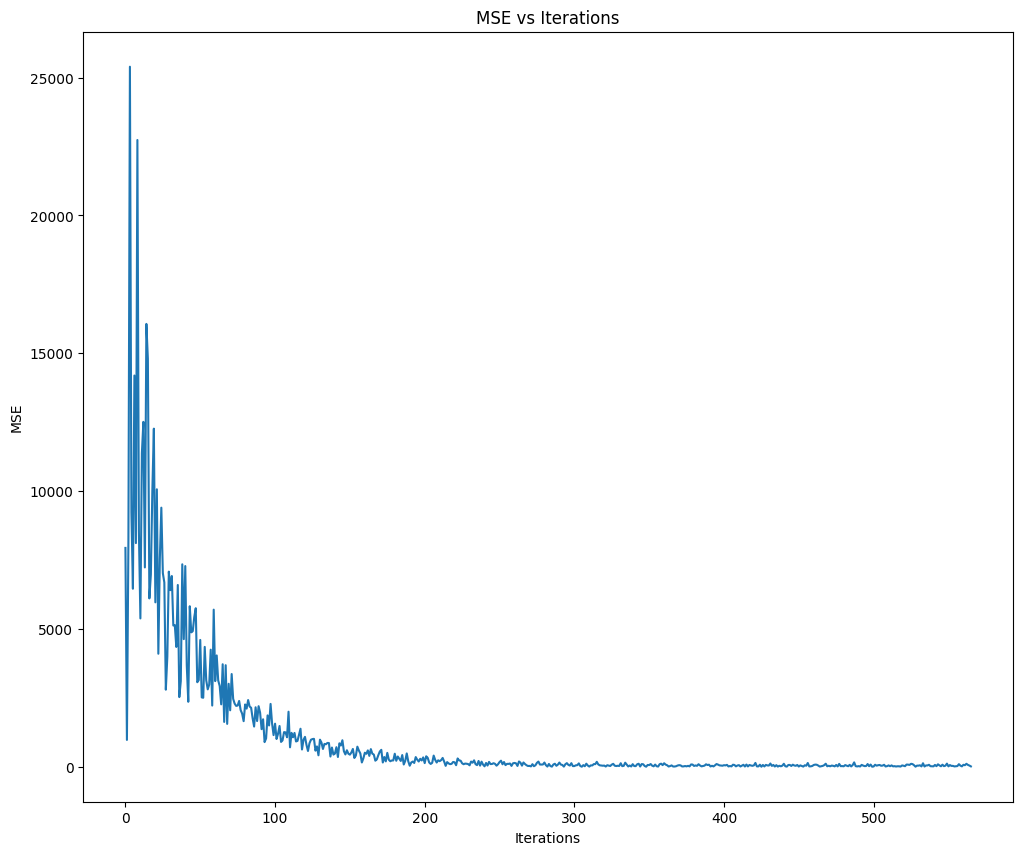

In [57]:
plt.figure(figsize = (12,10))
plt.plot(g[2])
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("MSE vs Iterations")
plt.show()